In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


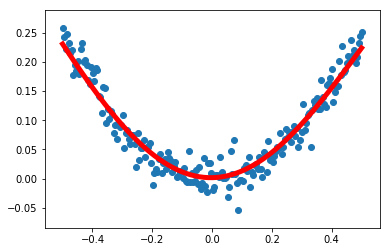

In [7]:
#生成200个数据
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]

noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise

#定义两个占位符
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

#定义神经网络中间层
Weights_L1 = tf.Variable(tf.random_normal([1,10]))
biases_L1 = tf.Variable(tf.zeros([1,10]))
X1 = tf.matmul(x,Weights_L1)+biases_L1
L1 = tf.nn.tanh(X1)

#定义神经网络输出层
Weights_L2 = tf.Variable(tf.random_normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
X2 = tf.matmul(L1,Weights_L2) + biases_L2
prediction = tf.nn.tanh(X2)

#二次代价函数
loss = tf.reduce_mean(tf.square(y-prediction))
#使用梯度下降法
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    #变量初始化
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        sess.run(train,feed_dict={x:x_data,y:y_data})
    
    #获得预测值
    prediction_value = sess.run(prediction,feed_dict = {x:x_data})
    
    #画图
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'r-',lw = 5)
    plt.show()